# Laboratorio: Preprocessamento dati ed analisi esplorativa con pandas

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
`nome.cognome@unibo.it`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dati: vendite Rossmann

Rossmann, azienda fondata in Germania, è una delle maggiori catene europee di farmacie.

Nel 2015 ha lanciato una [competizione su Kaggle](https://www.kaggle.com/c/rossmann-store-sales), condividendo alcuni dati storici su vendite e negozi con l'obiettivo di creare un modello di predizione delle vendite nei singoli negozi nelle sei settimane successive alla data della predizione.

In questo laboratorio utilizzeremo alcuni dati rilasciati da Rossmann per prendere confidenza con le funzioni avanzate di pandas e matplotlib. Più avanti vedremo come creare effettivamente un modello di predizione con questi dati.

### Caricamento dati

Lavoreremo con due file:

- il file `rossmann-sales.csv` contenente un estratto del file `train.csv` con i dati sulle vendite usati per l'addestramento dei modelli di predizione, che coprono un insieme di 1.115 negozi e un arco temporale di un mese (luglio 2015),
- il file `rossmann-stores.csv`, ovvero il file `store.csv` della competizione, contenente dati generali sui 1.115 negozi oggetto dell'analisi.

Iniziamo caricando il file `rossmann-sales.csv` con i dati sulle vendite.

CSV (_Comma Separated Values_) è un formato molto comune per i dati tabulari, per questo pandas offre una funzione `read_csv` con molti parametri impostabili per ottenere un `DataFrame` leggendo i dati da un file CSV.

Alla funzione `read_csv` (come ad altre funzioni di pandas per leggere file) è possibile passare sia il riferimento ad un file aperto con `open` o simili, sia direttamente il nome o percorso di un file da leggere, sia l'URL di un file da reperire dal Web.

Applichiamo quest'ultima possibilità, passando l'URL del file alla funzione `read_csv`.

In [2]:
sales = pd.read_csv("https://github.com/datascienceunibo/dialab2024/raw/main/Preprocessing_con_pandas/rossmann-sales.csv")

Vediamo un estratto del frame caricato scrivendone direttamente il nome. Di default di un frame con molte righe ne vengono visualizzate le prime 5 e le ultime 5.

In [3]:
sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
34560,1111,3,2015-07-01,3701,351,1,1,0,1
34561,1112,3,2015-07-01,10620,716,1,1,0,1
34562,1113,3,2015-07-01,8222,770,1,1,0,0
34563,1114,3,2015-07-01,27071,3788,1,1,0,0


Ciascuna riga del frame contiene i dati relativi ad un singolo negozio in una singola data.

Riportiamo sotto il significato delle colonne dalla pagina della competizione.

- `Store`: identificatore del negozio, un intero da 1 a 1.115
- `DayOfWeek`: giorno della settimana (1 = lunedì, 2 = martedì, ..., 7 = domenica)
- `Date`: data a cui si riferiscono i dati, nel formato standard ISO `YYYY-MM-DD`
- `Sales`: ricavo totale del negozio nella giornata _(valuta non indicata, assumeremo in Euro)_
- `Customers`: numero di clienti del negozio nella giornata
- `Open`: indica se il negozio era aperto (1 = aperto, 0 = chiuso)
- `Promo`: indica se una promozione era in corso nel negozio (1 = in corso, 0 = non in corso)
- `StateHoliday`: indica se nella data c'era una festività e di quale tipo (`a` = festa nazionale, `b` = Pasqua, `c` = Natale, 0 = nessuna festività)
- `SchoolHoliday`: indica se nella data le scuole erano chiuse (1 = chiuse, 0 = aperte)

Carichiamo ora il file `rossmann-stores.csv` con i dati sui singoli negozi, sempre passando l'URL del file alla funzione `read_csv`.

In [4]:
stores = pd.read_csv("https://github.com/datascienceunibo/dialab2024/raw/main/Preprocessing_con_pandas/rossmann-stores.csv")

In [5]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Ciascuna riga corrisponde ad un negozio, di cui sono riportate le informazioni descritte sotto.

- `Store`: identificatore del negozio da 1 a 1.115
- `StoreType`: lettera che distingue la tipologia di negozio (`a`, `b`, `c` o `d`)
- `Assortment`: livello di assortimento dei prodotti nel negozio (`a` = base, `b` = extra, `c` = esteso)
- `CompetitionDistance`: distanza in metri dal punto vendita concorrente più vicino
- `CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear`: mese e anno in cui il punto vendita concorrente più vicino è stato aperto
- `Promo2`: indica se il negozio prende parte a una promozione continuativa (0 = no, 1 = sì)
- `Promo2SinceWeek` e `Promo2SinceYear`: numero di settimana e anno a partire dai quali il negozio prende parte alla `Promo2`
- `PromoInterval`: mesi dell'anno in cui il negozio avvia la `Promo2`

### Indici dei frame

Di default `read_csv` intepreta come indice (nomi) delle colonne la prima riga del file, mentre associa come etichetta ad ogni riga un numero progressivo a partire da 0.

In questo caso il frame `stores` ha la colonna `Store` che svolge il ruolo di identificatore (o "chiave primaria") e che ha quindi senso usare come indice.

Usiamo il metodo `set_index` per sostituire il frame con una copia dove la colonna `Store` viene rimossa e usata come indice. _(non usiamo `inplace=True` in quanto sconsigliato e probabilmente assente in future versioni di pandas)_

In [6]:
stores = stores.set_index("Store")

Stampiamo la prima riga del frame per vedere il cambiamento.

In [7]:
sales.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [8]:
stores.head(3)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Esercizio 1: Ripasso pandas

Estrarre le seguenti informazioni dal frame `sales`.

- **(1a)** Quante sono le righe in cui il negozio analizzato è chiuso?
- **(1b)** Escludendo le righe in cui il negozio analizzato è chiuso, qual è il numero medio di clienti giornaliero?
- **(1c)** Qual è il ricavo totale del negozio con ID 123?
- **(1d)** Selezionare le 5 righe col ricavo giornaliero più alto

In [10]:
# 1a
(sales["Open"] == 0).sum()

4377

In [11]:
# 1b
sales.loc[sales["Open"] == 1, "Customers"].mean()

737.1766264740957

In [12]:
# 1c
sales.loc[sales["Store"] == 123, "Sales"].sum()

225366

In [13]:
# 1d
sales.sort_values("Sales", ascending=False).head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5836,262,7,2015-07-26,32547,4783,1,0,0,0
21446,262,7,2015-07-12,32271,4623,1,0,0,0
13641,262,7,2015-07-19,31665,4691,1,0,0,0
29251,262,7,2015-07-05,30255,4762,1,0,0,0
21183,1114,1,2015-07-13,28156,3592,1,1,0,0


## Dati mancanti

In alcune celle del frame `stores` stampato sopra è riportato `NaN` (_Not a Number_): si tratta di un valore numerico speciale che indica che il dato atteso è assente.

Questo può in generale accadere se il dato atteso non è noto (ad es. per errori nella raccolta dei dati) oppure se non esiste. Ad es. nel frame `stores` nelle righe in cui `Promo2` è 0 (ovvero la `Promo2` non è attiva) tutte gli altri attributi della `Promo2` sono `NaN` in quanto la data di inizio e i mesi della promozione _non ci sono_.

È di solito importante evitare la presenza di dati mancanti, in quanto non possono essere utilizzati ad es. nell'addestramento di modelli di predizione.

Si noti che tutte le operazioni e i confronti con valori `NaN` restituiscono `False`.

In [14]:
2 + np.nan

nan

In [15]:
np.nan > 0

False

`NaN` non è nemmeno considerato uguale a se stesso!

In [16]:
np.nan == np.nan

False

### Rilevazione dati mancanti

Per rilevare la presenza di valori `NaN` in una serie o frame si può usare il metodo `isna`, che restituisce una serie o frame booleano con gli stessi indici che indica `True` in corrispondenza dei valori `NaN` e `False` su quelli presenti. Esiste anche il metodo `notna` che restituisce una serie o frame booleano inverso rispetto a `isna` (`True` = presente, `False` = assente).

In [17]:
pd.Series([1, 2, np.nan, 3])

0    1.0
1    2.0
2    NaN
3    3.0
dtype: float64

In [18]:
pd.Series([1, 2, np.nan, 3]).isna()

0    False
1    False
2     True
3    False
dtype: bool

In [19]:
pd.Series([1, 2, np.nan, 3]).notna()

0     True
1     True
2    False
3     True
dtype: bool

Possiamo applicare `isna` ad un frame e usare a cascata un metodo di aggregazione per verificare la presenza di valori mancanti nelle singole colonne.

Vediamo ad esempio in quali colonne di `stores` è presente almeno un (`any`) valore mancante.

In [20]:
stores.isna().any()

StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

### Trattamento valori mancanti

Se sono presenti dati mancanti, esistono principalmente due modi per ottenere un set di dati senza di essi: _rimuovere_ righe o colonne con dati mancanti oppure _sostituire_ i valori `NaN` con altri.

Il metodo `dropna` applicato ad una serie restituisce una copia della serie senza i valori mancanti. `S.dropna()` è in pratica equivalente a `S.loc[S.notna()]`.

In [21]:
pd.Series([1, 2, np.nan, 3]).dropna()

0    1.0
1    2.0
3    3.0
dtype: float64

Se applicato ad un frame, `dropna` di default ne restituisce una copia dove sono rimosse tutte le _righe_ con _almeno un_ valore `NaN`. Questo comportamento può essere modificato con dei parametri, ad esempio con `axis=1` per eliminare invece le _colonne_ con almeno un `NaN` (vedere la [documentazione](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) per approfondire).

In [22]:
stores.dropna()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...
1105,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


Il metodo `fillna` restituisce invece una copia di serie o frame dove i valori `NaN` sono sostituiti con un valore dato.

In [23]:
pd.Series([1, 2, np.nan, 3]).fillna(0)

0    1.0
1    2.0
2    0.0
3    3.0
dtype: float64

Di solito i valori mancanti sono rimpiazzati con la media per i valori numerici o la moda per quelli categorici. A questo proposito si noti che quando si applica un metodo di riduzione di pandas (`sum`, `mean`, ...) i valori `NaN` di default sono ignorati (se fossero considerati, il risultato sarebbe anch'esso `NaN`).

In [24]:
pd.Series([1, 2, np.nan, 3]).sum()

6.0

Esistono altri metodi più avanzati per sostituire i valori mancanti in base a quelli vicini nella serie, si vedano ad es. `ffill`, `bfill` e `interpolate`.

### Esercizio 2: Valori mancanti

- **(2a)** Ottenere _il numero_ di valori mancanti in ciascuna colonna del frame `stores`
- **(2b)** Selezionare dal frame `stores` le righe dove il valore di `CompetitionDistance` è mancante
- **(2c)** Calcolare la media di `CompetitionDistance` assumendo di sostituire i valori mancanti col valore 1.000

In [26]:
# 2a
stores.isna().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [27]:
# 2b
stores.loc[stores["CompetitionDistance"].isna()]

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [28]:
# 2c
stores["CompetitionDistance"].fillna(1000).mean()

5393.04932735426

---

## Tipi di dato

`read_csv` dove possibile deduce in automatico i tipi delle colonne. Usiamo il metodo `info` per ottenere informazioni sui tipi di colonne e sul peso in memoria del frame caricato.

In [29]:
sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          34565 non-null  int64 
 1   DayOfWeek      34565 non-null  int64 
 2   Date           34565 non-null  object
 3   Sales          34565 non-null  int64 
 4   Customers      34565 non-null  int64 
 5   Open           34565 non-null  int64 
 6   Promo          34565 non-null  int64 
 7   StateHoliday   34565 non-null  int64 
 8   SchoolHoliday  34565 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 4.3 MB


In [30]:
stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1112 non-null   float64
 3   CompetitionOpenSinceMonth  761 non-null    float64
 4   CompetitionOpenSinceYear   761 non-null    float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            571 non-null    float64
 7   Promo2SinceYear            571 non-null    float64
 8   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 244.5 KB


pandas ha usato tipi numerici (`int64`, `float64`) dove ha trovato dati numerici e il tipo generico `object` in corrispondenza di dati testuali.

Sappiamo che le colonne `Open`, `Promo` e `SchoolHoliday` di `sales` e `Promo2` di `stores` sono binarie, ovvero hanno solo valori 0 e 1. Possiamo sostituire queste colonne con le loro conversioni in serie booleane usando il metodo `astype`.

In [31]:
sales["Open"] = sales["Open"].astype(bool)
sales["Promo"] = sales["Promo"].astype(bool)
sales["SchoolHoliday"] = sales["SchoolHoliday"].astype(bool)
stores["Promo2"] = stores["Promo2"].astype(bool)

Sappiamo inoltre che le colonne `StateHoliday` di `sales` e `StoreType` e `Assortment` di `stores` sono di tipo categorico: per queste è possibile usare il tipo di dato `category` che memorizza in modo efficiente colonne di questo tipo e fornisce operazioni specifiche. Possiamo convertirle sempre con `astype`.

In [32]:
sales["StateHoliday"] = sales["StateHoliday"].astype("category")
stores["StoreType"] = stores["StoreType"].astype("category")
stores["Assortment"] = stores["Assortment"].astype("category")

Infine, sapendo che la colonna `Date` di `sales` contiene delle date, possiamo convertirle nell'apposito tipo `datetime` di pandas che permette di compiere operazioni specifiche per le date. Usiamo la funzione `to_datetime` che effettua il parsing delle date inizialmente in forma di stringhe. Le date in questo dataset usano il formato `YYYY-MM-DD` secondo lo standard ISO 8601 per date e orari, che è riconosciuto automaticamente da `to_datetime` (è possibile interpretare formati diversi indicando opportuni parametri).

In [33]:
sales["Date"] = pd.to_datetime(sales["Date"])

Queste conversioni aiutano a ridurre il peso in memoria dei dataset, il che può essere fondamentale quando si trattano dataset molto grandi.

In [34]:
sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          34565 non-null  int64         
 1   DayOfWeek      34565 non-null  int64         
 2   Date           34565 non-null  datetime64[ns]
 3   Sales          34565 non-null  int64         
 4   Customers      34565 non-null  int64         
 5   Open           34565 non-null  bool          
 6   Promo          34565 non-null  bool          
 7   StateHoliday   34565 non-null  category      
 8   SchoolHoliday  34565 non-null  bool          
dtypes: bool(3), category(1), datetime64[ns](1), int64(4)
memory usage: 1.5 MB


In [35]:
stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   StoreType                  1115 non-null   category
 1   Assortment                 1115 non-null   category
 2   CompetitionDistance        1112 non-null   float64 
 3   CompetitionOpenSinceMonth  761 non-null    float64 
 4   CompetitionOpenSinceYear   761 non-null    float64 
 5   Promo2                     1115 non-null   bool    
 6   Promo2SinceWeek            571 non-null    float64 
 7   Promo2SinceYear            571 non-null    float64 
 8   PromoInterval              571 non-null    object  
dtypes: bool(1), category(2), float64(5), object(1)
memory usage: 113.5 KB


Vedremo in seguito come effettuare tutte le conversioni effettuate finora direttamente in fase di caricamento dei dati, impostando opportunamente i parametri di `read_csv`.

Ora che il frame `sales` è stato portato ad un formato stabile, vogliamo crearne una selezione `sales_open` da cui escludere le righe relative ai casi in cui il negozio considerato era chiuso nella data considerata.

In [36]:
sales_open = sales.loc[sales["Open"]]

In questo frame la colonna `Open` è sempre `True` ed è quindi non necessaria. Possiamo usare il metodo `drop` per creare una nuova versione del frame scartando questa colonna.

In [37]:
sales_open = sales_open.drop(columns=["Open"])

### Dati categorici

Le serie categoriche presentano attributi e metodi specifici per il loro processamento, contenute all'interno del loro attributo `cat`. Ad esempio con `cat.categories` possiamo ottenere tutte le categorie presenti nella serie. Sono presenti inoltre metodi per rinominare e rimuovere le categorie.

In [38]:
stores["StoreType"].cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

### Date

In modo simile, l'attributo `dt` fornisce attributi e metodi specifici per lavorare con le serie di tipo data/ora. È possibile ad esempio estrarre i singoli componenti delle date con attributi quali `day` per il giorno, `month` per il mese, ecc.

In [39]:
sales_open["Date"]

0       2015-07-31
1       2015-07-31
2       2015-07-31
3       2015-07-31
4       2015-07-31
           ...    
34560   2015-07-01
34561   2015-07-01
34562   2015-07-01
34563   2015-07-01
34564   2015-07-01
Name: Date, Length: 30188, dtype: datetime64[ns]

In [40]:
sales_open["Date"].dt.day

0        31
1        31
2        31
3        31
4        31
         ..
34560     1
34561     1
34562     1
34563     1
34564     1
Name: Date, Length: 30188, dtype: int64

### Esercizio 3: Date

- **(3a)** Tutte le righe del dataset `sales` si riferiscono al mese (`dt.month`) di luglio dell'anno (`dt.year`) 2015: scrivere un'espressione booleana che verifichi che questo sia vero
- **(3b)** L'attributo `dt.weekday` estrae i giorni della settimana con la codifica 0 = lunedì, 1 = martedì, ..., 6 = domenica; usarlo per verificare che tutti i valori della colonna `DayOfWeek` in `sales` (dove 1 = lunedì, ... 7 = domenica) siano corretti
  - per verificare se due serie `A` e `B` sono identiche si può usare `A.equals(B)`

In [42]:
# 3a
(sales["Date"].dt.year == 2015).all() and (sales["Date"].dt.month == 7).all()

True

In [43]:
# 3b
sales["DayOfWeek"].equals(sales["Date"].dt.weekday + 1)

True

## Analisi esplorativa

Vediamo alcuni metodi utili per analizzare la distribuzione dei valori all'interno delle diverse colonne dei frame.

Abbiamo già visto i metodi per ottenere singole statistiche (`sum`, `mean`, ...) e il metodo `describe` per ottenere un frame che le riassuma tutte.

In [44]:
sales_open.describe()

,Store,DayOfWeek,Sales,Customers
count,30188.000000,30188.000000,30188.000000,30188.000000
mean,557.949549,3.570227,7033.344905,737.176626
std,321.784839,1.652367,2937.213296,384.774903
min,1.000000,1.000000,708.000000,103.000000
25%,279.000000,2.000000,5060.000000,512.000000
50%,558.000000,4.000000,6523.000000,653.000000
75%,836.000000,5.000000,8410.000000,850.000000
max,1115.000000,7.000000,32547.000000,4783.000000


Notare che `describe` include solamente le colonne di tipo numerico e che anche tra queste alcune statistiche possono non essere significative. Ad es. essendo i valori di `Store` e `DayOfWeek` degli identificatori, statistiche quali la media non sono utili.

### Valori distinti e conteggio

Può essere utile vedere quali sono i valori distinti di una colonna, ad es. per colonne categoriche o assimilabili a tali. Il metodo `unique` applicato ad una serie restituisce un vettore NumPy con i valori distinti presenti in essa, in ordine di apparizione.

In [45]:
sales_open["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

Se interessa solo _il numero_ di valori distinti, possiamo usare il metodo `nunique`.

In [46]:
sales_open["DayOfWeek"].nunique()

7

Se vogliamo sapere quante volte appare ciascun valore distinto in una serie è possibile usare il metodo `value_counts`: questo restituisce una serie dove le etichette sono i valori distinti della serie originale dal più al meno frequente e i valori sono il numero di presenze di ciascuno.

In [47]:
pd.Series([11, 11, 42, 11, 81, 81]).value_counts()

11    3
81    2
42    1
dtype: int64

In [48]:
stores["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

È possibile indicare `normalize=True` per restituire delle frequenze relative invece dei conteggi.

In [49]:
stores["StoreType"].value_counts(normalize=True)

a    0.539910
d    0.312108
c    0.132735
b    0.015247
Name: StoreType, dtype: float64

Questo ci permette di vedere facilmente ad es. che il 54% dei negozi è di tipologia `a`.

Di default i valori mancanti non sono considerati, è possibile includerli specificando `dropna=False`.

In [50]:
stores["CompetitionOpenSinceMonth"].value_counts(dropna=False)

NaN     354
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

### Discretizzazione

Per svolgere un'analisi simile su colonne numeriche continue, possiamo eseguirne il _binning_ o _discretizzazione_.

L'intero intervallo di valori possibili di una serie è suddiviso in fasce (_bin_) e ogni valore è sostituito con la fascia in cui ricade

- La funzione `cut` crea un dato numero di fasce di **uguale ampiezza** o definite manualmente.
- La funzione `qcut` crea invece un dato numero di fasce suddividendo i campioni in **parti uguali**.

In tutti i casi si ottiene una serie categorica, dove i valori originali sono sostituiti con le rispettive fasce in cui ricadono.

Dividendo ad esempio il ricavo giornaliero con `cut(..., 4)`, otteniamo una serie categorica con 4 valori possibili, corrispondenti a 4 fasce di uguale ampiezza.

In [51]:
pd.cut(sales_open["Sales"], 4)

0         (676.161, 8667.75]
1         (676.161, 8667.75]
2         (676.161, 8667.75]
3         (8667.75, 16627.5]
4         (676.161, 8667.75]
                ...         
34560     (676.161, 8667.75]
34561     (8667.75, 16627.5]
34562     (676.161, 8667.75]
34563    (24587.25, 32547.0]
34564     (676.161, 8667.75]
Name: Sales, Length: 30188, dtype: category
Categories (4, interval[float64, right]): [(676.161, 8667.75] < (8667.75, 16627.5] < (16627.5, 24587.25] < (24587.25, 32547.0]]

Applicando `value_counts`, possiamo vedere il numero di casi in ciascuna delle 4 fasce.

In [52]:
pd.cut(sales_open["Sales"], 4).value_counts()

(676.161, 8667.75]     23374
(8667.75, 16627.5]      6455
(16627.5, 24587.25]      339
(24587.25, 32547.0]       20
Name: Sales, dtype: int64

Si nota ad es. che il ricavo giornaliero è arrivato a superare i 24.000 €, ma solo in poche decine di casi.

Per definire manualmente delle fasce, indichiamo una lista di valori corrispondenti ai limiti tra una fascia e l'altra. Agli estremi di questa lista è possibile usare `np.inf` e `-np.inf` come "infinito". Se questi non sono usati e un valore ricade fuori da qualsiasi fascia, questo corrisponderà ad un `NaN` nella serie risultante.

In [53]:
pd.cut(sales_open["Sales"], [0, 10000, 20000, np.inf])

0            (0.0, 10000.0]
1            (0.0, 10000.0]
2            (0.0, 10000.0]
3        (10000.0, 20000.0]
4            (0.0, 10000.0]
                ...        
34560        (0.0, 10000.0]
34561    (10000.0, 20000.0]
34562        (0.0, 10000.0]
34563        (20000.0, inf]
34564        (0.0, 10000.0]
Name: Sales, Length: 30188, dtype: category
Categories (3, interval[float64, right]): [(0.0, 10000.0] < (10000.0, 20000.0] < (20000.0, inf]]

In [54]:
pd.cut(sales_open["Sales"], [0, 10000, 20000, np.inf]).value_counts()

(0.0, 10000.0]        26272
(10000.0, 20000.0]     3793
(20000.0, inf]          123
Name: Sales, dtype: int64

### Esercizio 4: Analisi esplorativa

- **(4a)** Estrarre da `sales_open` una serie `per_customer_avg` con il ricavo medio per cliente
- **(4b)** Estrarre le statistiche di base (`describe`) sul ricavo medio per cliente
- **(4c)** Suddividere il ricavo medio per cliente in 5 fasce di uguale ampiezza ed estrarre il numero di casi per ciascuna

In [56]:
# 4a
per_customer_avg = sales_open["Sales"] / sales_open["Customers"]

In [57]:
# 4b
per_customer_avg.describe()

count    30188.000000
mean         9.967429
std          2.293514
min          3.016683
25%          8.293721
50%          9.762293
75%         11.457700
max         24.901205
dtype: float64

In [58]:
# 4c
pd.cut(per_customer_avg, 5).value_counts()

(7.394, 11.77]      20186
(11.77, 16.147]      6248
(2.995, 7.394]       3564
(16.147, 20.524]      188
(20.524, 24.901]        2
dtype: int64

## Unione (join) di DataFrame

È comune che un insieme di dati da analizzare non sia rappresentato da più tabelle piuttosto che da una sola. Questo accade ad esempio nei database relazionali, dove ogni tabella corrisponde ad un'entità specifica, di solito collegata ad altre tramite chiavi esterne.

Nei database relazionali è comune usare l'operazione di _join_ tra tabelle, con cui due tabelle vengono unite in una sola utilizzando le rispettive chiavi primarie ed esterne.

La funzione _merge_ di pandas crea un unico DataFrame dall'unione di altri due secondo la stessa logica.

Nel nostro caso ad esempio il frame `sales` non contiene tutte le informazioni di ciascun negozio analizzato, ma solo il suo numero identificativo. Le informazioni dettagliate su ciascun negozio si trovano nel frame `stores`, in cui i numeri identificativi dei negozi costituiscono l'indice.

In [59]:
sales.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,True,True,0,True
1,2,5,2015-07-31,6064,625,True,True,0,True
2,3,5,2015-07-31,8314,821,True,True,0,True


In [60]:
stores.head(3)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,True,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,True,14.0,2011.0,"Jan,Apr,Jul,Oct"


Può essere tuttavia utile avere un unico frame che contenga sia le colonne di `sales` che quelle di `stores`, affiancando ad ogni riga esistente di `sales` la riga di `stores` corrispondente all'identificatore del negozio indicato nella colonna `Store`. In questo modo potremmo ad es. filtrare i dati sulle vendite in base a caratteristiche dei negozi (tipologia, distanza dalla concorrenza, ecc.).

In termini di SQL, vorremmo eseguire una query simile:

```sql
SELECT sales.*, stores.*
FROM sales, stores
WHERE sales.Store = stores.Store
```

Per farlo usiamo la funzione `merge`, indicando come primi due argomenti i due frame da unire (referenziati come _left_ e _right_) e a seguire degli argomenti che indichino i valori da usare per l'unione da una parte e dall'altra:

- con `left_on=...` e/o `right_on=...` si indica il nome di una _colonna_ (o più) del frame left/right da usare per l'unione;
- con `left_index=True` e/o `right_index=True` si indica che del frame left/right va usato l'_indice delle righe_ per eseguire l'unione.

Nel nostro caso l'unione va effettuata tra i numeri identificativi dei negozi, che si trovano:

- nella colonna `Store` del frame `sales`
- nell'indice del frame `stores`

Per ottenere il frame unito, che chiamiamo `sales_joined`, scriviamo quindi:

In [61]:
sales_joined = pd.merge(
    sales,
    stores,
    left_on="Store",
    right_index=True,
)
sales_joined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,True,True,0,True,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
1115,1,4,2015-07-30,5020,546,True,True,0,True,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
2230,1,3,2015-07-29,4782,523,True,True,0,True,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
3345,1,2,2015-07-28,5011,560,True,True,0,True,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
4460,1,1,2015-07-27,6102,612,True,True,0,True,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30104,1115,7,2015-07-05,0,0,False,False,0,False,d,c,5350.0,NaN,NaN,True,22.0,2012.0,"Mar,Jun,Sept,Dec"
31219,1115,6,2015-07-04,6543,466,True,False,0,False,d,c,5350.0,NaN,NaN,True,22.0,2012.0,"Mar,Jun,Sept,Dec"
32334,1115,5,2015-07-03,7412,478,True,True,0,False,d,c,5350.0,NaN,NaN,True,22.0,2012.0,"Mar,Jun,Sept,Dec"
33449,1115,4,2015-07-02,6858,452,True,True,0,False,d,c,5350.0,NaN,NaN,True,22.0,2012.0,"Mar,Jun,Sept,Dec"


Ricreiamo `sales_open` a partire da questo nuovo frame, in modo da poter usare facilmente le caratteristiche dei negozi nelle analisi successive.

In [62]:
sales_open = sales_joined.loc[sales_joined["Open"]].drop(columns="Open")

## Analisi esplorativa tramite grafici

I grafici sono utili per indicare visivamente come sono distribuiti i valori in una serie di dati.

Abbiamo introdotto nello scorso lab **matplotlib**, una libreria Python diffusa per creare grafici di svariati tipi.

Abbiamo visto i grafici a barre e i boxplot e come applicare alcune personalizzazioni di base.

Vediamo altri tipi di grafici disponibili e altre opzioni per personalizzarli.

Iniziamo importando l'interfaccia "pyplot" e impostando il rendering nel file Jupyter.

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

### Grafico a torta

Un grafico a torta raffigura un cerchio diviso in settori (spicchi) di diverse dimensioni.

Si può creare con la funzione `pie`, passando un vettore che definisce le proporzioni tra gli spicchi. Con l'attributo `labels` è possibile assegnare etichette a ciascun settore.

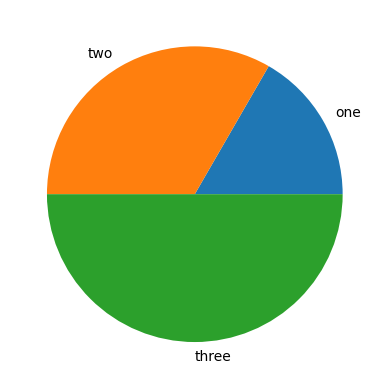

In [64]:
plt.pie([1, 2, 3], labels=["one", "two", "three"]);

Di default i colori del grafico sono scelti automaticamente, ma si può impostare manualmente una lista di colori con l'attributo `colors`.

I colori possono essere specificati [in vari modi](https://matplotlib.org/stable/tutorials/colors/colors.html), ad es. per nome, in notazione HTML/CSS o come tupla di valori RGB.

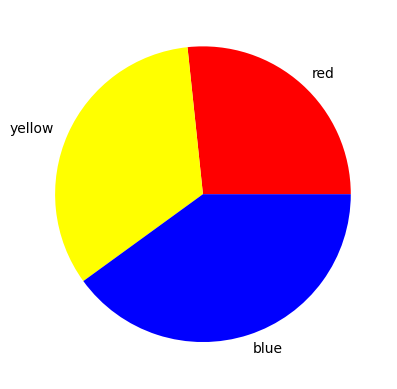

In [65]:
plt.pie(       [ 0.8,   1.0,       1.2           ],
        labels=[ "red", "yellow",  "blue"        ],
        colors=[ "red", "#ffff00", (0.0,0.0,1.0) ]);

I grafici a torta sono utilizzati comunemente per visualizzare la distribuzione di valori categorici.

Riprendiamo ad esempio il conteggio dei negozi di ciascun tipo (`StoreType`).

In [66]:
stores_by_type = stores["StoreType"].value_counts()
stores_by_type

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

Possiamo usare la funzione `pie` per visualizzare tale distribuzione in un grafico a torta...

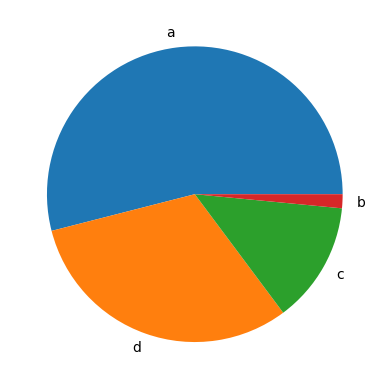

In [67]:
plt.pie(
    stores_by_type,
    labels=stores_by_type.index,
);

...o usare direttamente il metodo `plot.pie` della serie.

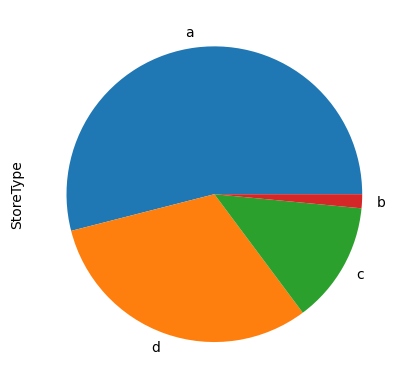

In [68]:
stores_by_type.plot.pie();

Per personalizzare i colori, possiamo definire un dizionario che associa ad ogni classe un colore da utilizzare...

In [69]:
store_type_colors = {"a": "blue", "b": "red", "c": "green", "d": "yellow"}

...e utilizzare il metodo `map` per convertire ciascun valore nel suo colore

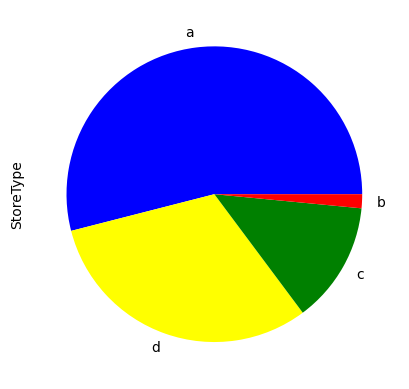

In [70]:
stores_by_type.plot.pie(colors=stores_by_type.index.map(store_type_colors));

Possiamo visualizzare un grafico a torta anche di una serie numerica continua, discretizzandone i valori con `cut`.

Riprendiamo ad esempio il grafico la distribuzione delle vendite in 4 fasce e visualizziamola in un grafico.

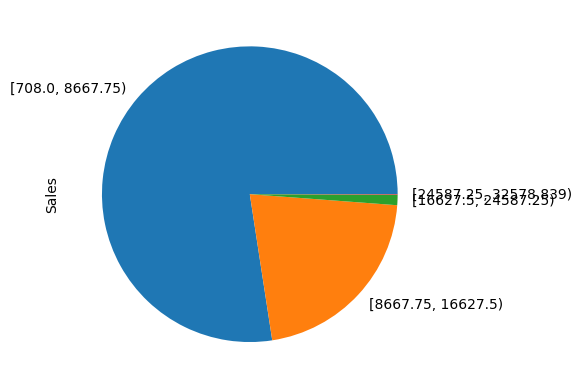

In [71]:
pd.cut(sales_open["Sales"], 4, right=False).value_counts().plot.pie();

Un grafico a torta può essere personalizzato passando parametri alla funzione o al metodo `pie`

Ad es. `autopct=X` visualizza su ogni sezione le percentuali corrispondenti con un formato specificato (`%.2f` = percentuale con 2 cifre decimali, `%%` = simbolo "%")

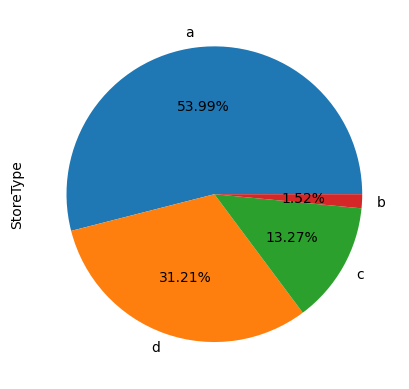

In [72]:
stores["StoreType"].value_counts().plot.pie(autopct="%.2f%%");

### Grafico a barre

Abbiamo visto nel laboratorio precedente come usare un grafico a barre per confrontare tra loro singoli valori.

Possiamo usarlo anche per visualizzare la distribuzione di valori categorici, come alternativa ad un grafico a torta.

Applichiamo il metodo `plot.bar` al conteggio dei valori della colonna `StoreType`.

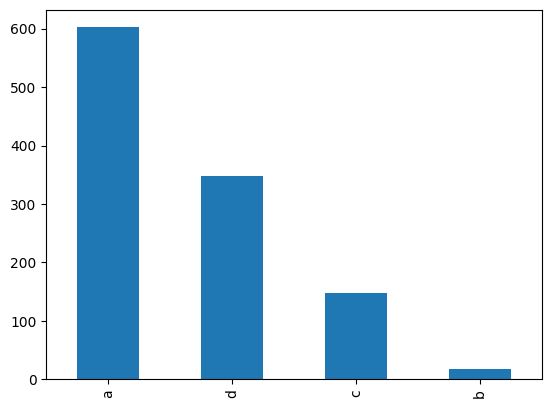

In [73]:
stores["StoreType"].value_counts().plot.bar();

### Istogramma

Un istogramma visualizza in un diagramma a barre la distribuzione di valori in una serie numerica.

Possiamo crearlo suddividendo i valori in intervalli di pari ampiezza (come per `pd.cut`) e indicando il numero di valori in ciascun intervallo in un grafico a barre.

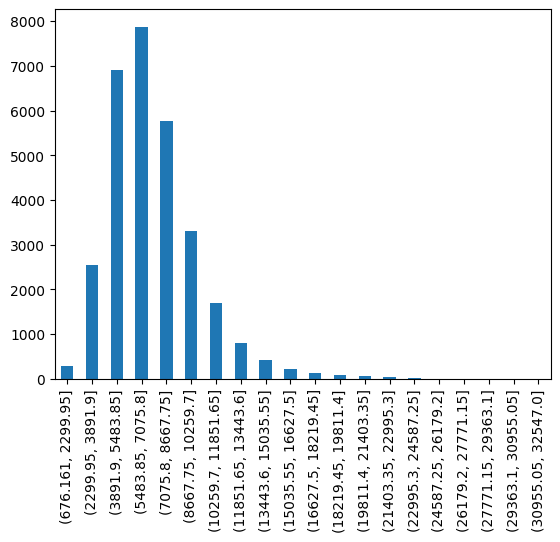

In [74]:
(
    pd.cut(sales_open["Sales"], bins=20)  # discretizzo i valori
    .value_counts()               # estraggo i conteggi
    .sort_index()                 # devo ordinare i valori per etichetta!
    .plot.bar()
);

È però più conveniente usare la funzione `hist`, a cui passare direttamente i dati e il numero di fasce da creare `bins` (default 10)...

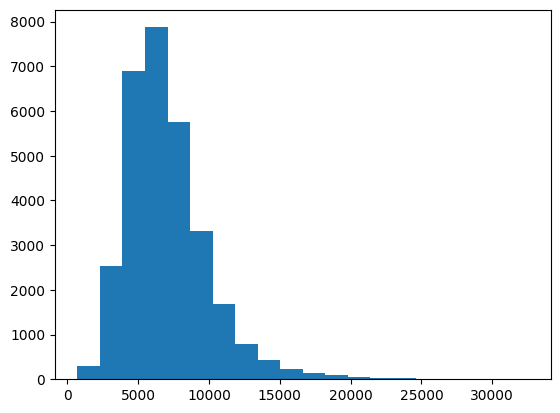

In [75]:
plt.hist(sales_open["Sales"], bins=20);

...oppure il metodo equivalente `plot.hist`

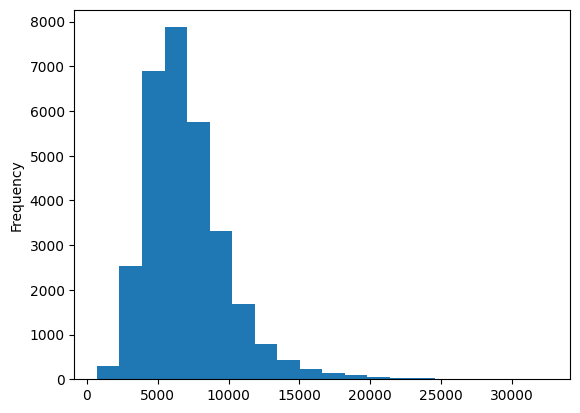

In [76]:
sales_open["Sales"].plot.hist(bins=20);

Dall'istogramma abbiamo una conferma "visiva" di quanto visto nelle analisi precedenti: nella maggior parte dei casi il ricavo giornaliero è di solito entro i 10.000 €, ma in casi rari può raggiungere i 30.000 €

### Box plot

Abbiamo visto nello scorso lab il _box plot_ come metodo per visualizzare le statistiche essenziali di una serie di valori.

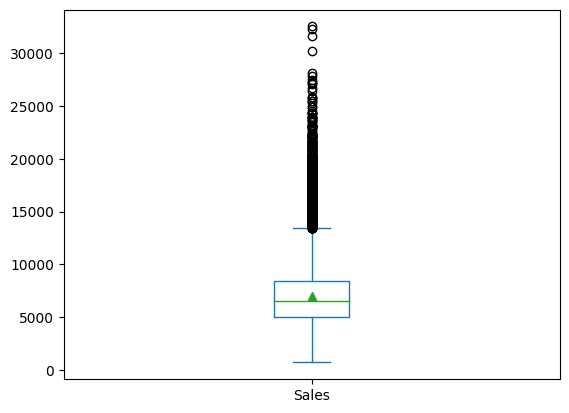

In [77]:
sales_open["Sales"].plot.box(showmeans=True);

In [78]:
sales_open["Sales"].describe()

count    30188.000000
mean      7033.344905
std       2937.213296
min        708.000000
25%       5060.000000
50%       6523.000000
75%       8410.000000
max      32547.000000
Name: Sales, dtype: float64

- Il rettangolo evidenzia che il 50\% "centrale" dei ricavi è tra 5.000 € e 8.400 € circa
- Il triangolo (7.000 €) e la linea centrale (6.500 €) indicano rispettivamente **media** e **mediana (50%)**
- I "baffi" indicano il **minimo** (700 €) e il **massimo** (13.000 €) dei dati "ordinari"
- I valori molto fuori dalla norma (_outlier_) sono mostrati come cerchi esterni ai baffi

Possiamo invocare `plot.box` su un frame per visualizzare i box di tutte le colonne numeriche in un solo grafico.

Tuttavia, se i valori sono su scale diverse come in questo caso, alcuni box plot risultano schiacciati.

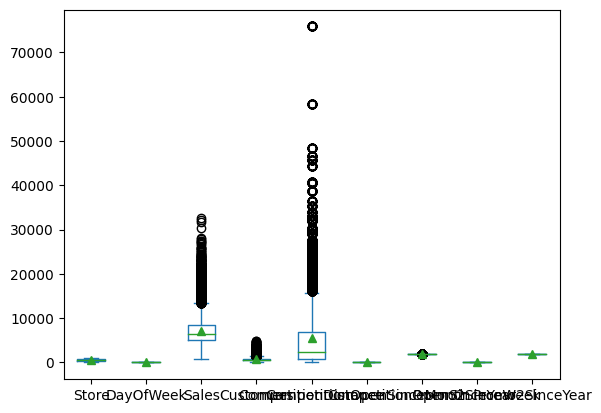

In [79]:
sales_open.plot.box(showmeans=True);

I frame forniscono anche il metodo `boxplot` con alcune funzioni aggiuntive
  - con `column` si specifica di quale colonna mostrare il grafico
  - con `by` si partizionano i dati secondo il valore di un'altra colonna e si mostra il box plot per gruppi

Vediamo ad esempio la distribuzione dei ricavi differenziata per giorno della settimana

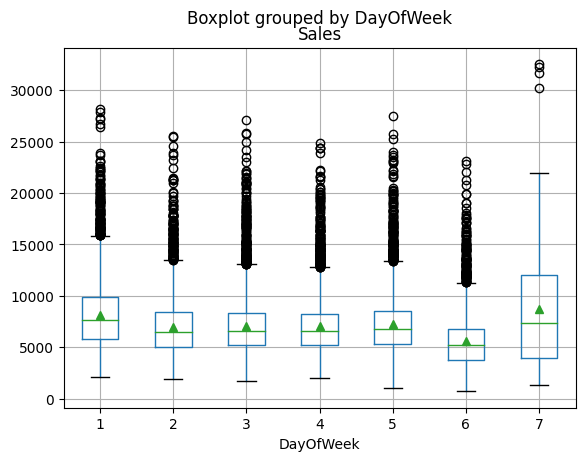

In [80]:
sales_open.boxplot(column="Sales", by="DayOfWeek", showmeans=True);

### Grafico a dispersione

Un grafico a dispersione (_scatter plot_) visualizza dei punti in un piano.

Si crea con la funzione `scatter`, passando due vettori di pari lunghezza con rispettivamente i valori per le coordinate X e Y di ciascun punto.

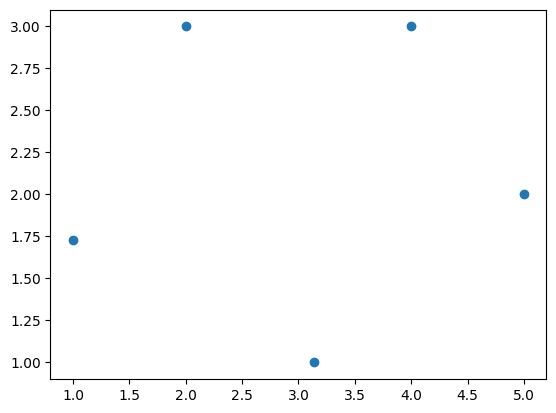

In [81]:
plt.scatter(
    [1,    2, 3.14, 4, 5],   # X
    [1.73, 3, 1,    3, 2],   # Y
);

Un grafico a dispersione può essere usato per visualizzare la distribuzione di due variabili in modo congiunto.

In questo modo è possibile **valutare se esiste una correlazione** tra tali due variabili.

Vediamo ad esempio la correlazione tra il numero dei clienti (asse X) e il ricavo totale (asse Y).

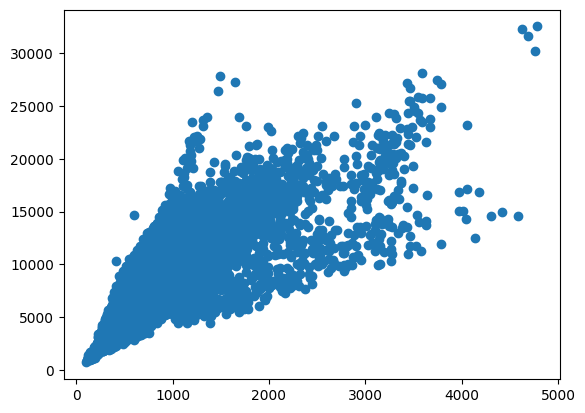

In [82]:
plt.scatter(
    sales_open["Customers"],  # X
    sales_open["Sales"],      # Y
);

Possiamo ottenere lo stesso grafico col metodo `plot.scatter` sul frame, specificando i nomi delle colonne da usare come X e Y.

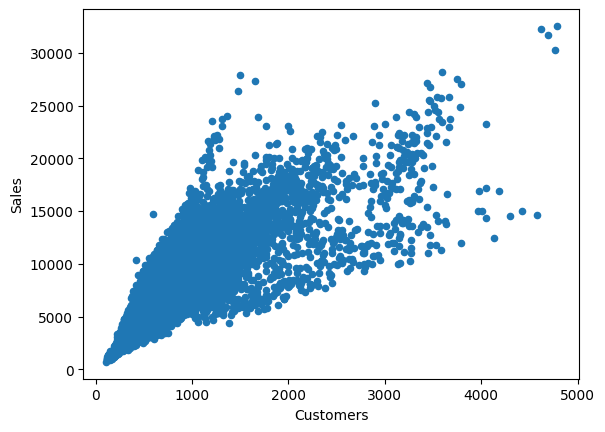

In [83]:
sales_open.plot.scatter("Customers", "Sales");

Il grafico evidenzia visivamente che in tendenza il ricavo giornaliero è (come prevedibile) tanto più alto quanto più sono i clienti.

I parametri `s` (size) e `c` (col) di `scatter` permettono di decidere dimensione e colore dei punti.

Qui assegniamo la stessa dimensione e colore a tutti i punti, ma vedremo che si possono anche differenziare in base ai dati.

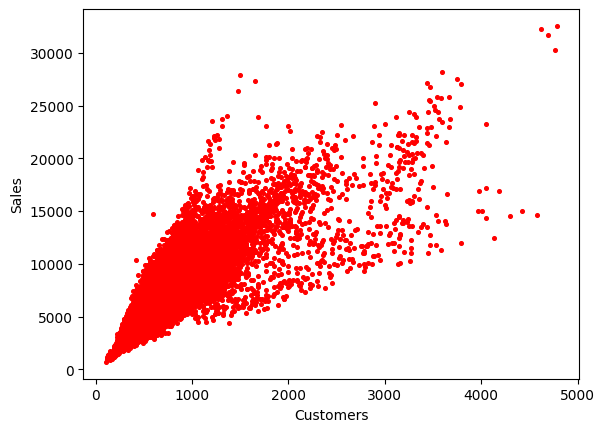

In [84]:
sales_open.plot.scatter("Customers", "Sales", s=7, c="red");

### Esercizio 5: Grafici

Creare i seguenti grafici dai frame `sales_open` e `stores`:

- **(5a)** un grafico a torta con la distribuzione del numero di clienti in tre fasce di uguale ampiezza
- **(5b)** un grafico a torta con la distribuzione dei tipi di assortimento (`Assortment`) dei soli negozi di tipologia (`StoreType`) `a`
- **(5c)** un'istogramma con la distribuzione del ricavo giornaliero medio per cliente
- **(5d)** un box plot con la stessa distribuzione (5c)
- **(5e)** un grafico a dispersione con la correlazione tra distanza dal punto vendita concorrente più vicino e ricavo
- **(5f)** una serie di box plot con la distribuzione del numero medio di clienti giornalieri per ciascuna tipologia (`StoreType`) di negozio

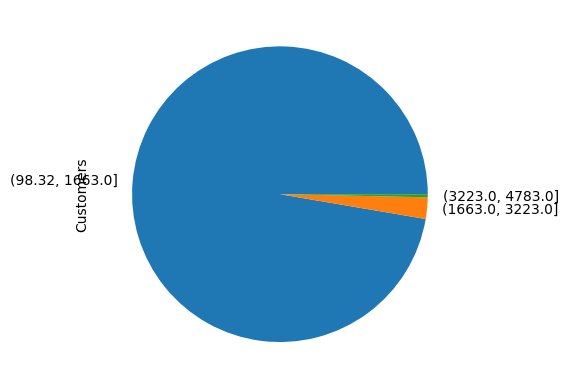

In [86]:
# 5a
pd.cut(sales_open["Customers"], 3).value_counts().plot.pie();

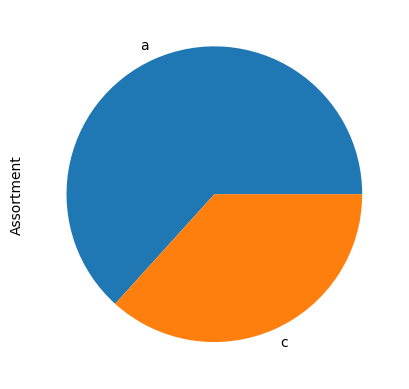

In [87]:
# 5b
stores.loc[stores["StoreType"] == "a", "Assortment"].value_counts().plot.pie();

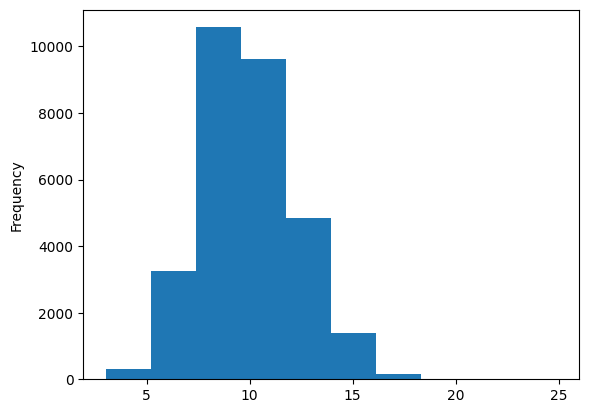

In [88]:
# 5c
(sales_open["Sales"] / sales_open["Customers"]).plot.hist();

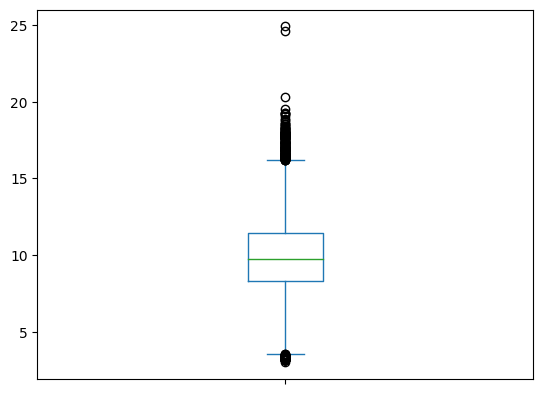

In [89]:
# 5d
(sales_open["Sales"] / sales_open["Customers"]).plot.box();

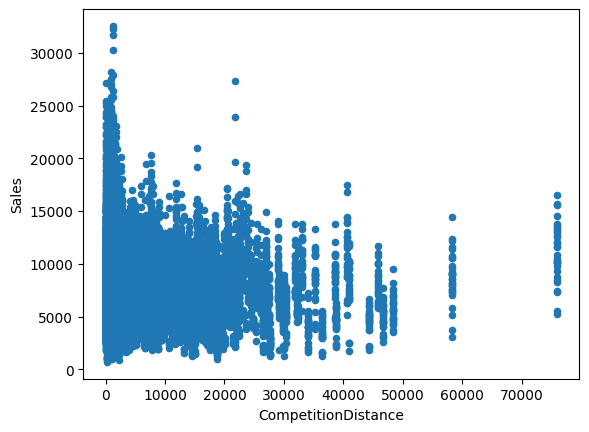

In [90]:
# 5e
sales_open.plot.scatter("CompetitionDistance", "Sales");

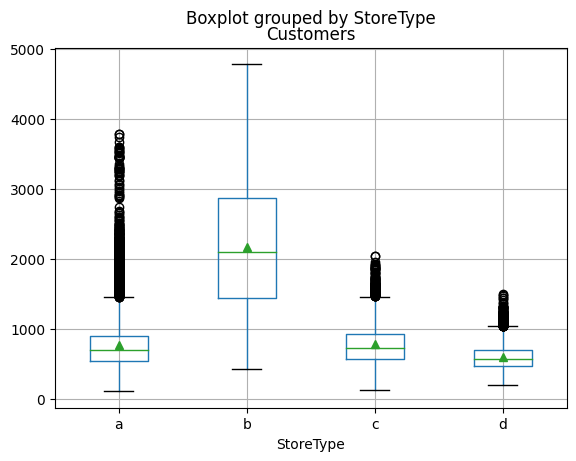

In [91]:
# 5f
sales_open.boxplot(column="Customers", by="StoreType", showmeans=True);